In [2]:
pip install pandas matplotlib

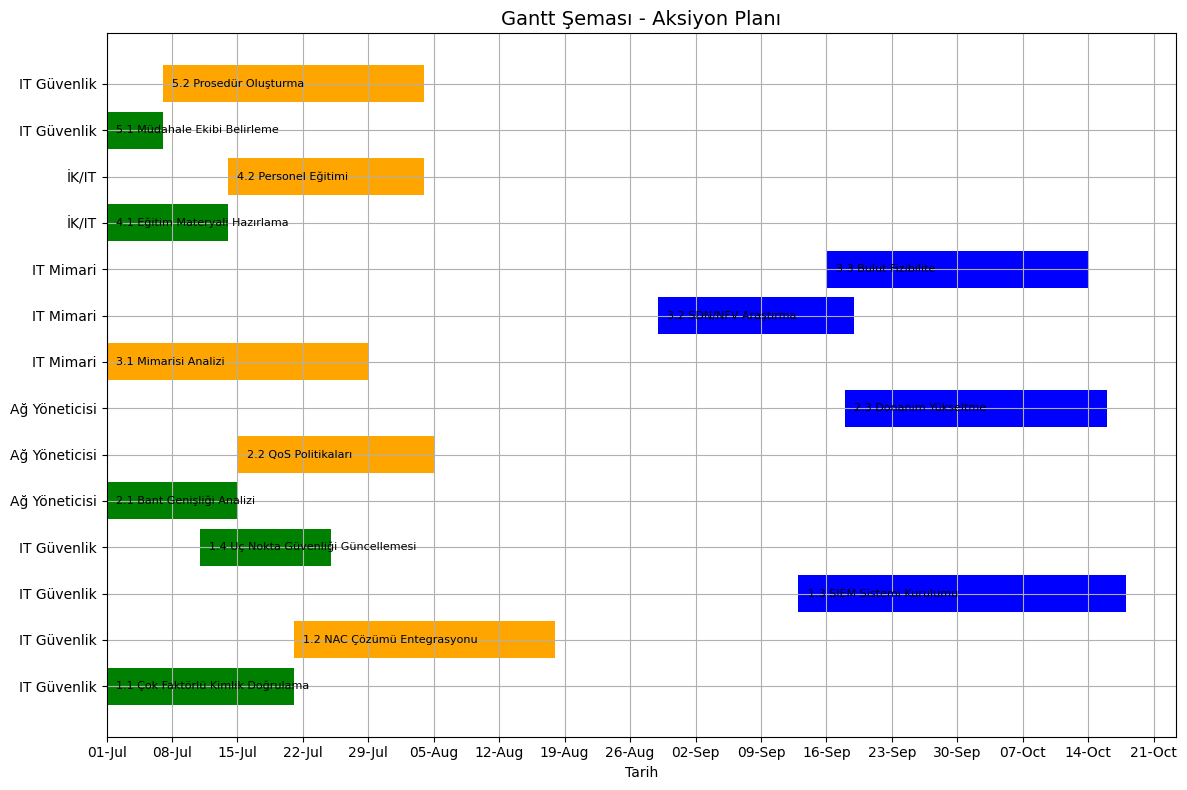

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Görev planı verileri
tasks = [
    # Ağ Güvenliği Geliştirmeleri
    ("1.1 Çok Faktörlü Kimlik Doğrulama", "IT Güvenlik", "2025-07-01", "2025-07-21", "Tamamlandı"),
    ("1.2 NAC Çözümü Entegrasyonu", "IT Güvenlik", "2025-07-21", "2025-08-18", "Devam Ediyor"),
    ("1.3 SIEM Sistemi Kurulumu", "IT Güvenlik", "2025-09-13", "2025-10-18", "Planlandı"),
    ("1.4 Uç Nokta Güvenliği Güncellemesi", "IT Güvenlik", "2025-07-11", "2025-07-25", "Tamamlandı"),

    # Ağ Performansı Optimizasyonu
    ("2.1 Bant Genişliği Analizi", "Ağ Yöneticisi", "2025-07-01", "2025-07-15", "Tamamlandı"),
    ("2.2 QoS Politikaları", "Ağ Yöneticisi", "2025-07-15", "2025-08-05", "Devam Ediyor"),
    ("2.3 Donanım Yükseltme", "Ağ Yöneticisi", "2025-09-18", "2025-10-16", "Planlandı"),

    # Ölçeklenebilirlik Stratejileri
    ("3.1 Mimarisi Analizi", "IT Mimari", "2025-07-01", "2025-07-29", "Devam Ediyor"),
    ("3.2 SDN/NFV Araştırma", "IT Mimari", "2025-08-29", "2025-09-19", "Planlandı"),
    ("3.3 Bulut Fizibilite", "IT Mimari", "2025-09-16", "2025-10-14", "Planlandı"),

    # Farkındalık Eğitimi
    ("4.1 Eğitim Materyali Hazırlama", "İK/IT", "2025-07-01", "2025-07-14", "Tamamlandı"),
    ("4.2 Personel Eğitimi", "İK/IT", "2025-07-14", "2025-08-04", "Devam Ediyor"),

    # Olay Müdahale Planı
    ("5.1 Müdahale Ekibi Belirleme", "IT Güvenlik", "2025-07-01", "2025-07-07", "Tamamlandı"),
    ("5.2 Prosedür Oluşturma", "IT Güvenlik", "2025-07-07", "2025-08-04", "Devam Ediyor"),
]

# Veriyi DataFrame'e çevir
df = pd.DataFrame(tasks, columns=["Görev", "Sorumlu", "Başlangıç", "Bitiş", "Durum"])
df["Başlangıç"] = pd.to_datetime(df["Başlangıç"])
df["Bitiş"] = pd.to_datetime(df["Bitiş"])

# Renk atamaları
durum_renk = {
    "Tamamlandı": "green",
    "Devam Ediyor": "orange",
    "Planlandı": "blue"
}

# Gantt çizimi
fig, ax = plt.subplots(figsize=(12, 8))

for i, row in df.iterrows():
    ax.barh(i, (row["Bitiş"] - row["Başlangıç"]).days, left=row["Başlangıç"],
            color=durum_renk[row["Durum"]])
    ax.text(row["Başlangıç"] + timedelta(days=1), i, row["Görev"], va='center', ha='left', fontsize=8)

# Ayarlar
ax.set_yticks(range(len(df)))
ax.set_yticklabels(df["Sorumlu"])
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%b"))
plt.title("Gantt Şeması - Aksiyon Planı", fontsize=14)
plt.xlabel("Tarih")
plt.tight_layout()
plt.grid(True)
plt.show()